In [1]:
import pandas as pd

file_name = 'Raisin_Dataset.xlsx'

df = pd.read_excel(file_name)

In [2]:
import sklearn
import tensorflow as tf
print(sklearn.__version__)
print(tf.__version__)

1.3.0
2.13.0


In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
missing_values = df.isna().sum()
print (missing_values)
df = df.dropna()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [5]:
#Splitting the data into training and test test
X = df.iloc[:,0:7].values
y = df.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [6]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, ...,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, ...,
        7.87890000e+04, 6.84129570e-01, 1.12178600e+03],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, ...,
        9.37170000e+04, 6.37612812e-01, 1.20857500e+03],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, ...,
        1.06264000e+05, 7.41098519e-01, 1.29282800e+03],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, ...,
        9.76530000e+04, 6.58798253e-01, 1.25854800e+03],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, ...,
        8.91970000e+04, 6.32019963e-01, 1.27286200e+03]])

In [7]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop


model = Sequential()

model.add(Dense(7,input_shape=(7,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(RMSprop(lr=0.5),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 2)                 16        
                                                                 
Total params: 184 (736.00 Byte)
Trainable params: 184 (736.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
import numpy as np
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 18ms/step - loss: 99.5055 - accuracy: 0.5139 - val_loss: 90.9369 - val_accuracy: 0.5389
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 69.9592 - accuracy: 0.5181 - val_loss: 79.6502 - val_accuracy: 0.5333
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 66.3866 - accuracy: 0.5056 - val_loss: 107.4516 - val_accuracy: 0.5000
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 68.9721 - accuracy: 0.5250 - val_loss: 61.5437 - val_accuracy: 0.5444
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 62.0271 - accuracy: 0.5264 - val_loss: 85.3330 - val_accuracy: 0.5278
Epoch 6/100
23/23 [==============================] - 0s 10ms/step - loss: 59.8954 - accuracy: 0.5556 - val_loss: 69.5813 - val_accuracy: 0.5333
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 59.7530 - accuracy: 0.5208 - val_loss: 78.1012 - val_accuracy: 0.5

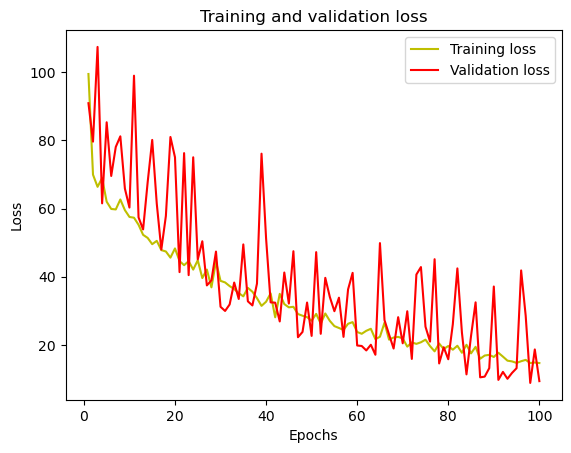

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

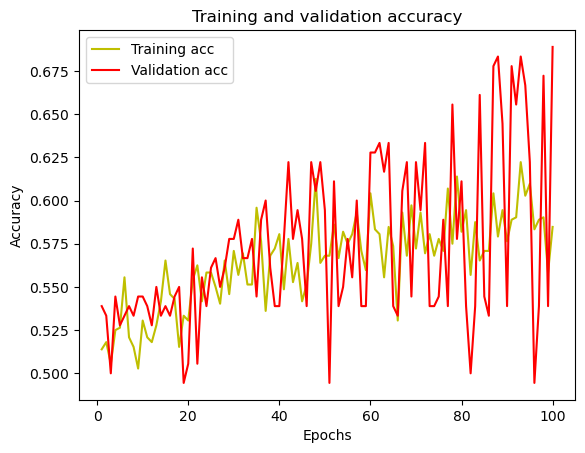

In [11]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        97
           1       0.81      0.42      0.56        83

    accuracy                           0.69       180
   macro avg       0.73      0.67      0.66       180
weighted avg       0.73      0.69      0.67       180

[[89  8]
 [48 35]]
